In [ ]:
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import io
data = pd.read_csv(io.BytesIO(uploaded['Latest_Data_Science_Salaries.csv']))


In [ ]:
data.head()

,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year
0,Data Engineer,Full-Time,Senior,Expert,210000,United States Dollar,United States,210000,United States,Medium,2023
1,Data Engineer,Full-Time,Senior,Expert,165000,United States Dollar,United States,165000,United States,Medium,2023
2,Data Engineer,Full-Time,Senior,Expert,185900,United States Dollar,United States,185900,United States,Medium,2023
3,Data Engineer,Full-Time,Senior,Expert,129300,United States Dollar,United States,129300,United States,Medium,2023
4,Data Scientist,Full-Time,Senior,Expert,140000,United States Dollar,United States,140000,United States,Medium,2023


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Latest_Data_Science_Salaries.csv to Latest_Data_Science_Salaries.csv


In [ ]:
import pandas as pd
import io

data = pd.read_csv(io.BytesIO(uploaded['Latest_Data_Science_Salaries.csv']))

In [ ]:
missing_values = data.isnull().sum()
print(missing_values)


Job Title             0
Employment Type       0
Experience Level      0
Expertise Level       0
Salary                0
Salary Currency       0
Company Location      0
Salary in USD         0
Employee Residence    0
Company Size          0
Year                  0
dtype: int64


In [ ]:
Q1 = data['Salary'].quantile(0.25)
Q3 = data['Salary'].quantile(0.75)

IQR = Q3 - Q1

In [ ]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
data = data[~((data['Salary'] < lower_bound) | (data['Salary'] > upper_bound))]

In [ ]:
print("Data shape after removing outliers:", data.shape)
data.head()


Data shape after removing outliers: (3208, 11)


,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year
0,Data Engineer,Full-Time,Senior,Expert,210000,United States Dollar,United States,210000,United States,Medium,2023
1,Data Engineer,Full-Time,Senior,Expert,165000,United States Dollar,United States,165000,United States,Medium,2023
2,Data Engineer,Full-Time,Senior,Expert,185900,United States Dollar,United States,185900,United States,Medium,2023
3,Data Engineer,Full-Time,Senior,Expert,129300,United States Dollar,United States,129300,United States,Medium,2023
4,Data Scientist,Full-Time,Senior,Expert,140000,United States Dollar,United States,140000,United States,Medium,2023


In [ ]:
from sklearn.preprocessing import LabelEncoder


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

data['Experience Level'] = label_encoder.fit_transform(data['Experience Level'])
data['Expertise Level'] = label_encoder.fit_transform(data['Expertise Level'])

In [ ]:
print("Unique values in 'Experience Level':", data['Experience Level'].unique())
print("Unique values in 'Expertise Level':", data['Expertise Level'].unique())

data.head()


Unique values in 'Experience Level': [3 2 1 0]
Unique values in 'Expertise Level': [1 2 0 3]


,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year
0,Data Engineer,Full-Time,3,1,210000,United States Dollar,United States,210000,United States,Medium,2023
1,Data Engineer,Full-Time,3,1,165000,United States Dollar,United States,165000,United States,Medium,2023
2,Data Engineer,Full-Time,3,1,185900,United States Dollar,United States,185900,United States,Medium,2023
3,Data Engineer,Full-Time,3,1,129300,United States Dollar,United States,129300,United States,Medium,2023
4,Data Scientist,Full-Time,3,1,140000,United States Dollar,United States,140000,United States,Medium,2023


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
data['Salary in USD'] = scaler.fit_transform(data[['Salary in USD']])


In [ ]:
print("Mean of standardized salaries:", round(data['Salary in USD'].mean(), 2))
print("Standard deviation of standardized salaries:", round(data['Salary in USD'].std(), 2))

data.head()

Mean of standardized salaries: 0.0
Standard deviation of standardized salaries: 1.0


,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year
0,Data Engineer,Full-Time,3,1,210000,United States Dollar,United States,1.057732,United States,Medium,2023
1,Data Engineer,Full-Time,3,1,165000,United States Dollar,United States,0.358587,United States,Medium,2023
2,Data Engineer,Full-Time,3,1,185900,United States Dollar,United States,0.683301,United States,Medium,2023
3,Data Engineer,Full-Time,3,1,129300,United States Dollar,United States,-0.196068,United States,Medium,2023
4,Data Scientist,Full-Time,3,1,140000,United States Dollar,United States,-0.029827,United States,Medium,2023


In [ ]:
data.describe()


,Experience Level,Expertise Level,Salary,Salary in USD,Year
count,3208.000000,3208.000000,3208.000000,3.208000e+03,3208.000000
mean,2.414589,1.366584,141576.828865,1.771927e-16,2022.508416
std,0.923416,0.702993,64965.547542,1.000156e+00,0.703631
min,0.000000,0.000000,14000.000000,-1.971896e+00,2020.000000
25%,2.000000,1.000000,92000.000000,-7.476154e-01,2022.000000
50%,3.000000,1.000000,137500.000000,-8.055364e-02,2023.000000
75%,3.000000,2.000000,185000.000000,6.693179e-01,2023.000000
max,3.000000,3.000000,333500.000000,4.007812e+00,2023.000000


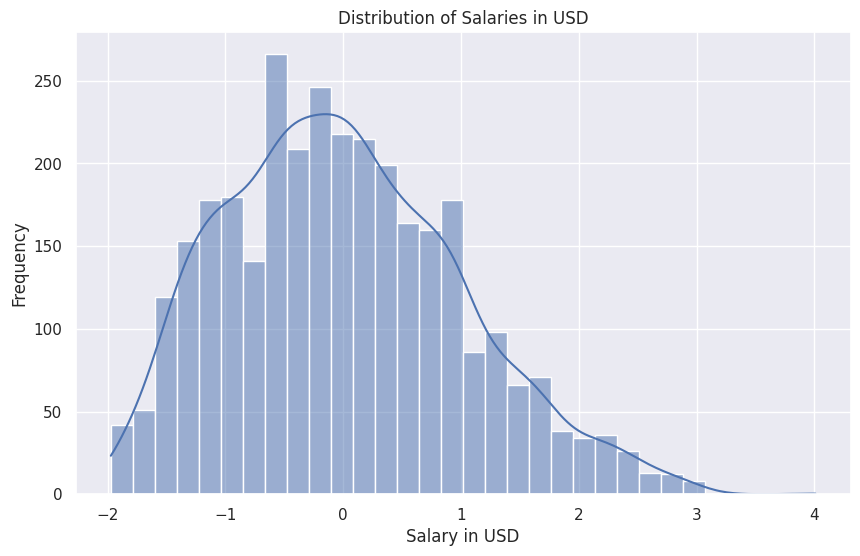

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

plt.figure(figsize=(10, 6))
sns.histplot(data['Salary in USD'], kde=True)
plt.title('Distribution of Salaries in USD')
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.show()


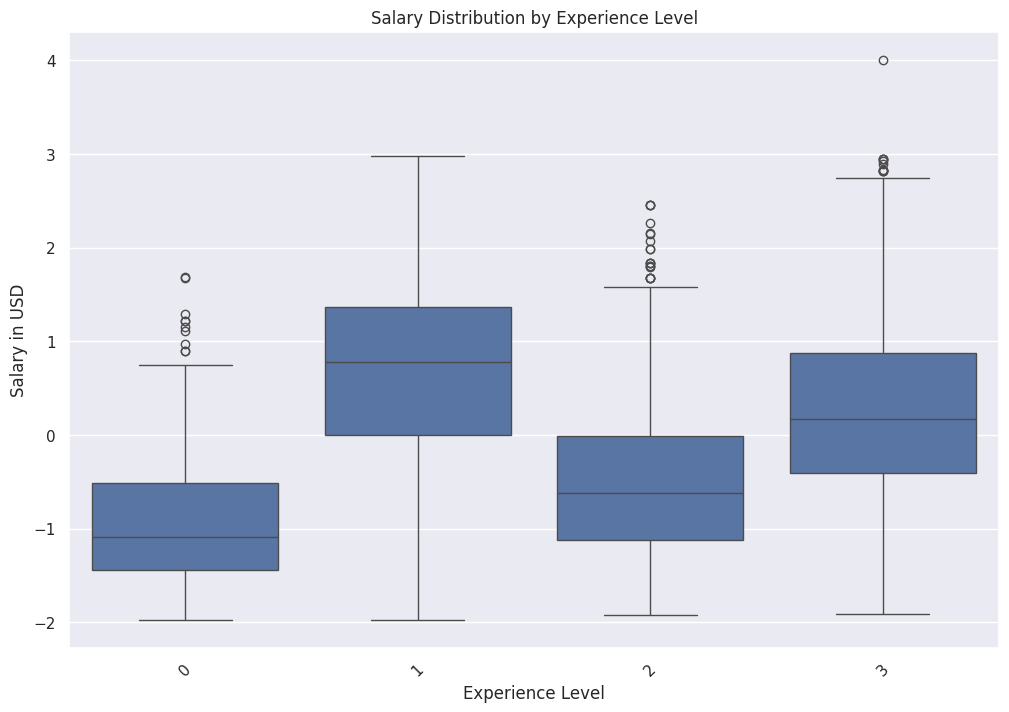

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Experience Level', y='Salary in USD', data=data)
plt.title('Salary Distribution by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary in USD')
plt.xticks(rotation=45)
plt.show()

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

ValueError: could not convert string to float: 'Data Engineer'

<Figure size 1000x800 with 0 Axes>

In [ ]:
numeric_data = data.select_dtypes(include=[np.number])

NameError: name 'np' is not defined

In [ ]:
import numpy as np

In [ ]:
numeric_data = data.select_dtypes(include=[np.number])

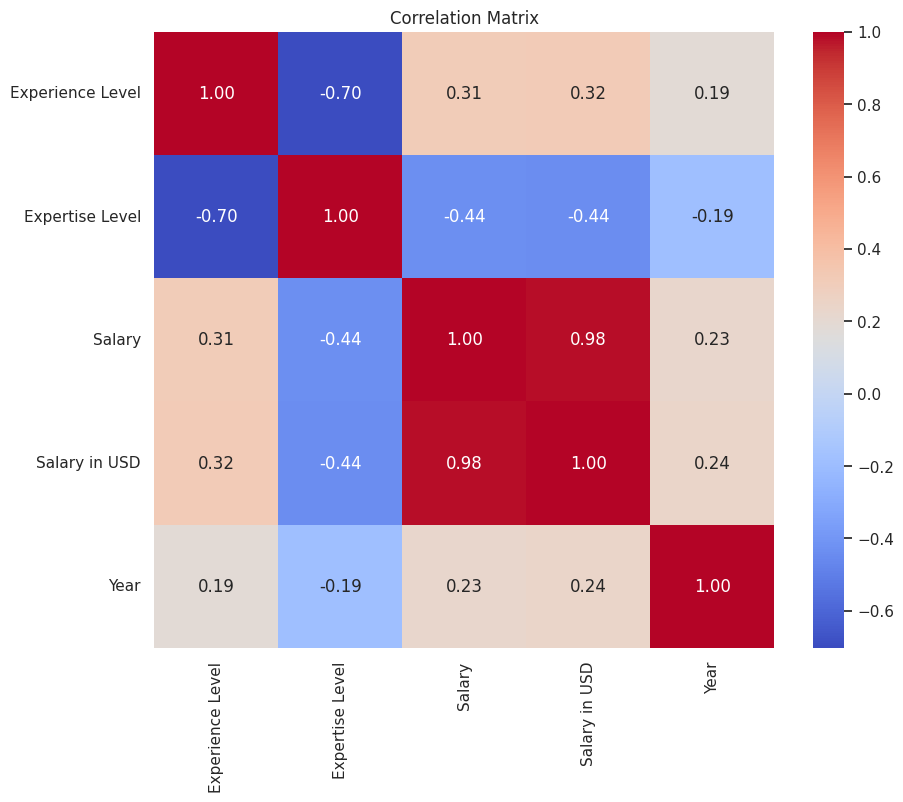

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


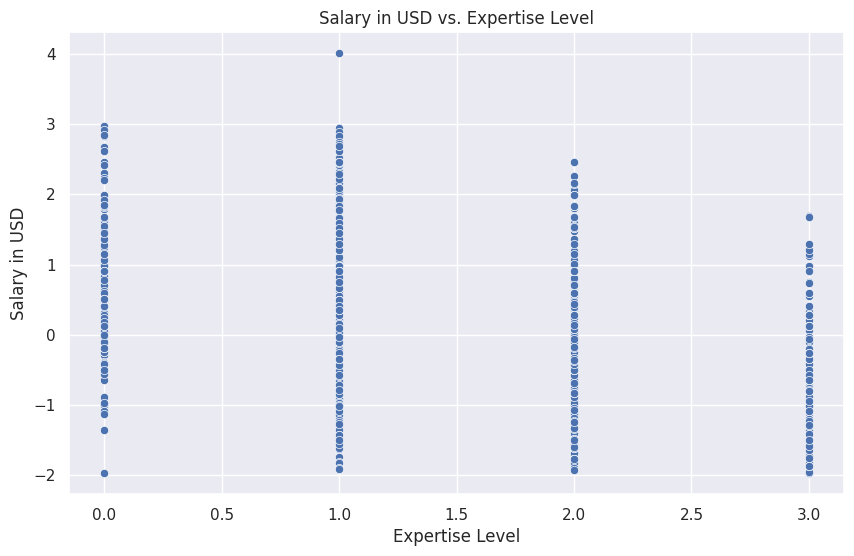

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Expertise Level', y='Salary in USD', data=data)
plt.title('Salary in USD vs. Expertise Level')
plt.xlabel('Expertise Level')
plt.ylabel('Salary in USD')
plt.show()

In [ ]:
import numpy as np

salary_threshold = data['Salary in USD'].median()
data['High_Salary'] = np.where(data['Salary in USD'] >= salary_threshold, 1, 0)

In [ ]:
from sklearn.model_selection import train_test_split

X = data[['Expertise Level']]  # Predictor
y = data['High_Salary']        # Response

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)


LogisticRegression()

In [ ]:
y_scores = clf.predict_proba(X_test)[:, 1]


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = roc_auc_score(y_test, y_scores)

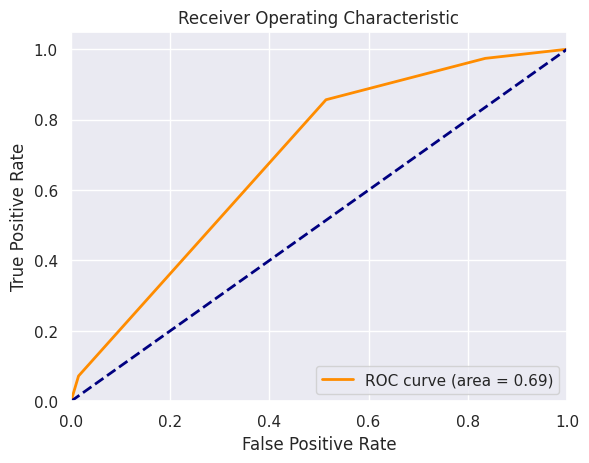

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
X = data[['Experience Level', 'Expertise Level']]
y = data['Salary in USD']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)


LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.8103461781982509
Mean Absolute Error: 0.7174258337524778
R-squared: 0.18943515097897068


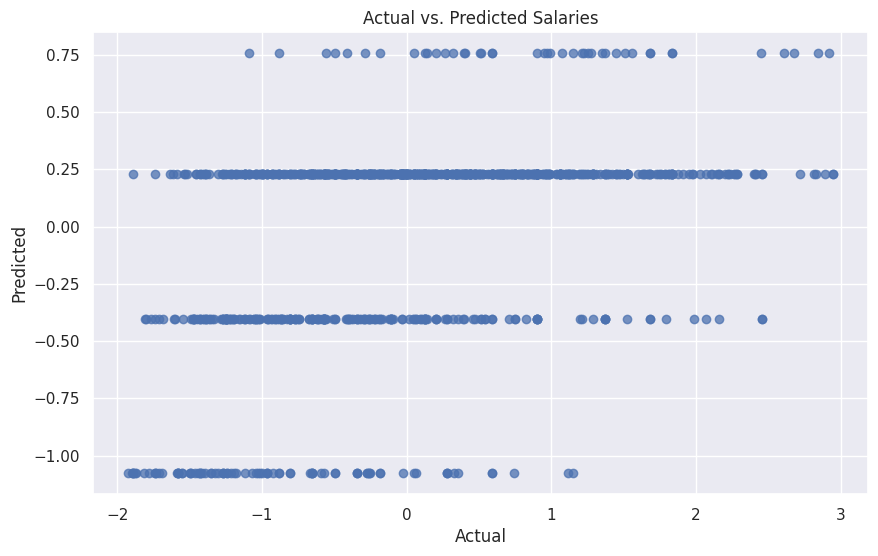

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.75, color='b')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Salaries')
plt.show()

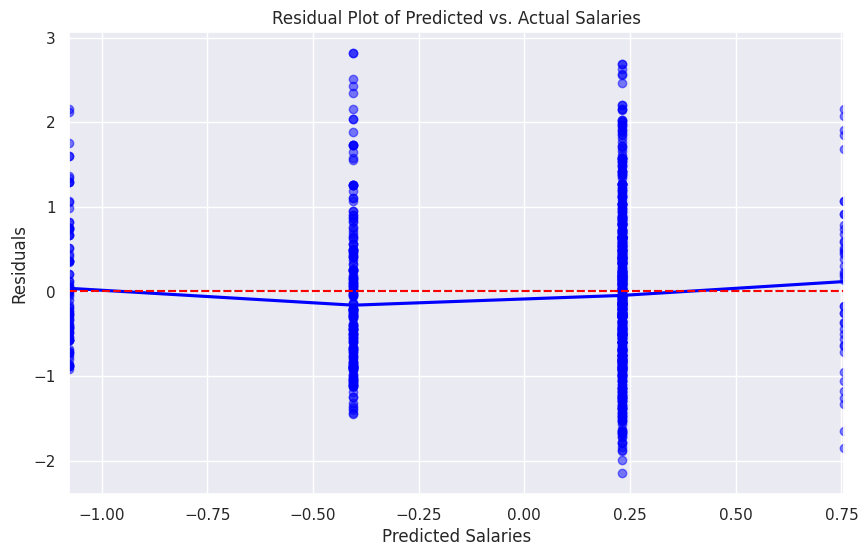

In [ ]:
import seaborn as sns

# residual plot
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True, color='blue', scatter_kws={'alpha': 0.5})
plt.xlabel('Predicted Salaries')
plt.ylabel('Residuals')
plt.title('Residual Plot of Predicted vs. Actual Salaries')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

model = LinearRegression()

cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

print(f"Average R-squared from cross-validation: {cv_scores.mean():.2f}")

Average R-squared from cross-validation: 0.13


In [ ]:
cv_mae = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
print(f"Average MAE from cross-validation: {-cv_mae.mean():.2f}")

cv_mse = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
print(f"Average MSE from cross-validation: {-cv_mse.mean():.2f}")

Average MAE from cross-validation: 0.72
Average MSE from cross-validation: 0.82


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the model on training data
model.fit(X_train, y_train)

# Predict on testing data
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R-squared on test data: {r2:.2f}")
print(f"Mean Squared Error on test data: {mse:.2f}")
print(f"Mean Absolute Error on test data: {mae:.2f}")

R-squared on test data: 0.19
Mean Squared Error on test data: 0.81
Mean Absolute Error on test data: 0.72


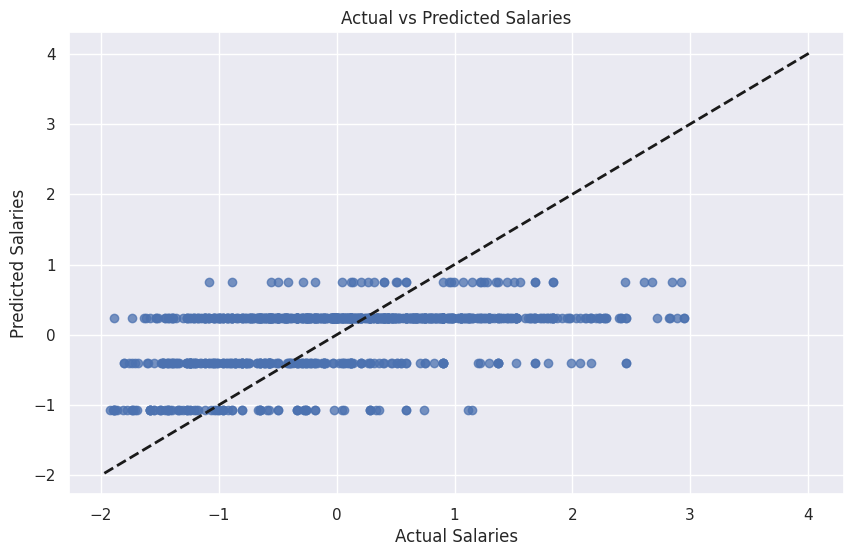

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.75)
plt.xlabel('Actual Salaries')
plt.ylabel('Predicted Salaries')
plt.title('Actual vs Predicted Salaries')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Diagonal line for perfect predictions
plt.show()

In [ ]:
import pandas as pd

results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

results_df = results_df.sort_values(by='Actual').reset_index(drop=True)


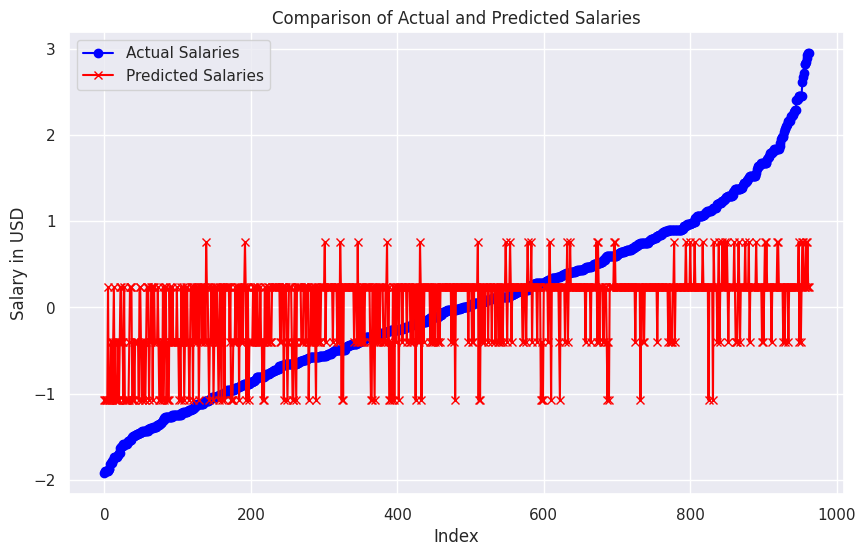

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(results_df['Actual'], label='Actual Salaries', marker='o', linestyle='-', color='blue')
plt.plot(results_df['Predicted'], label='Predicted Salaries', marker='x', linestyle='-', color='red')
plt.title('Comparison of Actual and Predicted Salaries')
plt.xlabel('Index')
plt.ylabel('Salary in USD')
plt.legend()
plt.grid(True)
plt.show()